In [1]:
# importar todas las funciones de pylab
from pylab import *

# importar el módulo pyplot
import matplotlib.pyplot as plt

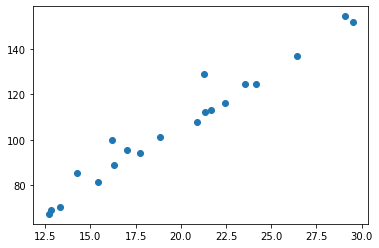

In [24]:
from pylab import * # importar todas las funciones de pylab
import numpy as np

x1 = np.random.uniform(10,30,size=20)

error1 = np.random.uniform(-1,3,size=20)

y1 = 3 + 5*x1 + np.exp(error1)

plt.plot(x1,y1,'o')

In [43]:
X = np.ones(len(x1))
X = np.append(X,x1)
X = X.reshape((2, len(x1))).T

# Regresión lineal simple
## Introducción al modelo

La regresión lineal simple parte de una sóla variable predictora, es decir $X=x_1$ donde $X \in R$ y supone que existe aproximadamente una relación lineal entre X e Y. Esta relación lineal puede ser escrita como:

$$Y = \beta_0 + \beta_1X + \epsilon$$

Es decir, Y es igual a X multiplicado por un coeficiente más un coeficiente de offset y un término de error. La parte $\beta_0 + \beta_1X$ es el modelo de regresión lineal, siendo $\beta_0$ y $\beta_1$ los coeficientes de la regresión lineal y $\epsilon$ el error cometido por el modelo.

Los términos $\beta_0$ y $\beta_1$ representan respectivamente el interceptor y la pendiente del modelo lineal. Son lo que se denomina coeficientes o parámetros del modelo de regresión lineal. Estos dos coeficientes son dos constantes que se obtienen por medio de lo que se denomina «entrenamiento» del modelo de regresión. Este entrenamiento se realiza con datos de los que sabemos valores reales de la tupla (X,y). Una vez obtenida la estimación de estos dos coeficientes se puede predecir la variable Y usando X conocidos y a partir de la siguiente fórmula:

$$\tilde{y} = \tilde{\beta}_0 + \tilde{\beta}_1X$$

Siendo $\tilde{y}$ la predicción que obtenemos y $\tilde{\beta}_0$ y $\tilde{\beta}_1$ estimaciones obtenidas con el entrenamiento.

Si el término de error $\epsilon$ es bajo para esta muestra, nuestra predicción será aproximadamente igual al valor real:

$$\tilde{y} \sim y$$

Por lo tanto, el entrenamiento y ajuste del modelo de regresión simple tratará de obtener los valores de $\tilde{\beta}_0$ y $\tilde{\beta}_1$ que mejor ajusten el modelo, es decir, mejor predigan el Y en función de X.

## Estimación de los coeficientes

Como hemos dicho antes, la estimación de los coeficientes se realiza con valores reales conocidos de la tupla (X,y). Supongamos que tenemos n registros con variable independiente y dependiente conocidas:

$$(x_1,y_1),(x_2,y_2)...,(x_n,y_n)$$

Con estas $n$ observaciones, el objetivo es obtener las estimaciones de los coeficientes $\tilde{\beta}_0$ y $\tilde{\beta}_1$ que hagan que el modelo lineal se ajuste lo mejor posible a los datos. Es decir, que $y_i \sim \tilde{\beta}_0+  \tilde{\beta}_i x_i$ para todos los $x_i$, o lo que es lo mismo, encontrar la pendiente y la ordenada en el origen de la recta que pasa más cerca de los puntos $(x_i,y_i)$.

Esta medida de cercania entre la recta y los puntos se puede hacer de distintas formas, siendo la forma más común la de ajustar por mínimos cuadrados (less squares criterion).

## Estimación por mínimos cuadrados

Siendo $\tilde{y}_i = \tilde{\beta}_0+  \tilde{\beta}_i x_i$ las predicciones de $y_i$, el residuo o diferencia entre la predicción y el valor real es:

$$r_i=y_i−\tilde{y}_i$$

El método de mínimos cuadrados obtendrá los coeficientes que minimicen la suma de residuos al cuadrado, es decir, que minimicen:

$$RSS = \sum_{i=1}^n (r_i)^2$$

Usando derivadas parciales e igualando a 0 obtenemos que:

$$\tilde{\beta}_1 = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i- \bar{x})^2}$$

$$\tilde{\beta}_0 = \bar{y} - \tilde{\beta}_1\bar{x}$$

Siendo $\bar{x}$ e $\bar{y}$ las medias aritméticas de las muestras.


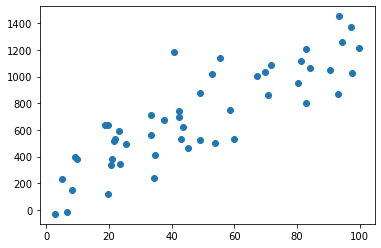

In [20]:
# Ejemplo de regresión lineal simple usando Python

# Primeramente creo un dataset de prueba, al que ajustaré un modelo de regresión lineal.

import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
 
# Generador de distribución de datos para regresión lineal simple
def generador_datos_simple(beta0, beta, muestras, desviacion):
    # Genero n (muestras) valores de x aleatorios entre 0 y 100
    x = np.random.random(muestras) * 100
    # Genero un error aleatorio gaussiano con desviación típica (desviacion)
    e = np.random.randn(muestras) * desviacion
    # Obtengo el y real como x*beta + error
    y = beta0 + x * beta + e
    return x.reshape((muestras,1)), y.reshape((muestras,1))
 
# Parámetros de la distribución
desviacion = 200
beta = 10
beta0 = 200
n = 50
x, y = generador_datos_simple(beta0, beta, n, desviacion)
 
# Represento los datos generados
plt.scatter(x, y)
plt.show()

In [56]:
# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(x, y)
# Ahora puedo obtener el coeficiente b_1
print(u'Coeficiente beta1: ', modelo.coef_[0])

beta0_est = y.mean() - modelo.coef_[0][0]*x.mean()

print(u'Coeficiente beta0: ', beta0_est)

# Podemos predecir usando el modelo
y_pred = modelo.predict(x)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2
print(u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print(u'Estadístico R_2: %.2f' % r2_score(y, y_pred))


Coeficiente beta1:  [9.26078364]
Coeficiente beta0:  255.29341006494354
Error cuadrático medio: 30712.35
Estadístico R_2: 0.73


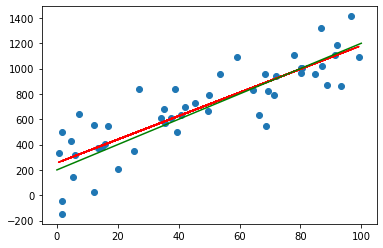

In [59]:
# Representamos el ajuste (rojo) y la recta Y = beta0 + beta*x (verde)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
x_real = np.array([0, 100])
y_real = beta0 + x_real*beta
plt.plot(x_real, y_real, color='green')
plt.show()


# Regresión lineal múltiple
## Introducción al modelo

En la práctica solemos tener $n$ variables predictoras, no sólo 1. Podríamos hacer $n$ regresiones lineales simples, pero cada una de ellas ignoraría a las otras $n-1$ variables y no se sacaría ventaja de las relaciones entre variables.

La regresión lineal simple puede extenderse para el caso de $n$ variables como:

$$y = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + ... + \beta_n x_{n} + \epsilon$$

En este caso a cada variable predictora le asignamos un coeficiente que marca la pendiente. Estos coeficientes $\beta_i$ marcan la relación lineal entre $y$ y la variable $x_i$. Se puede interpretar como el efecto medio en $y$ de un incremento de una unidad en $x_i$, manteniendo el resto de variables predictoras fijas.

## Estimación de los coeficientes

Análogamente a la regresión lineal simple, podemos obtener estimaciones $\tilde{\beta}_i$ de los coeficientes $\beta_i$ mediante el entrenamiento y posteriormente hacer predicciones de $y$ usando la fórmula:

$$\tilde{y} = \tilde{\beta}_0 + \tilde{\beta}_1 x_1 + ... + \tilde{\beta}_n x_n$$

Estos parámetros son calculados usando una medida de cercanía como los cuadrados medios. Calculamos los $\tilde{\beta}_i$ que minimizan la suma de residuos al cuadrado:

$$RSS = \sum_{i=1}^m r_i^2 = \sum_{i=1}^m (y_i - \tilde{y}_i)^2 = \sum_{i=1}^m (y_i - \tilde{\beta}_0 - \tilde{\beta}_1 x_1 - ... - \tilde{\beta}_n x_n)^2$$



In [21]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
 
def generador_datos_multiple(coeficientes, muestras, std_dev):
    # Calculamos el número de predictores y creamos una matriz 
    # con los coeficientes con p filas y 1 columna para 
    # multiplicación de matrices
    n_coeficientes = len(coeficientes)
    coef_matriz = np.array(coeficientes).reshape(n_coeficientes, 1)
    # Igual que en el caso de regresión lineal simple
    x = np.random.random_sample((muestras, n_coeficientes)) * 100
    epsilon = np.random.randn(muestras) * std_dev
    # Como x es una matriz (muestras x n_coeficientes), y 
    # coef_matriz es (n_coeficientes x 1)
    # Podemos hacer multiplicación de matrices para obtener y 
    # dados x1,x2,...,xn necesitamos hacer la transpuesta 
    # para obtener un array 1xmuestras en lugar de muestrasx1 para 
    # usar la regresión
    y = np.matmul(x, coef_matriz).transpose() + epsilon
    return x, y
 
# Genero los datos que ajustaré con la recta
coeficientes_reales =[10, 5]
muestras = 200
std_dev = 100
 
X, Y = generador_datos_multiple(coeficientes_reales, muestras, std_dev)
 
# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(X, Y.transpose())
# Ahora puedo obtener el coeficiente b_1
print(u'Coeficiente beta1: ', modelo.coef_[0])
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2
print(u'Error cuadrático medio: ',mean_squared_error(Y.transpose(), y_pred))
print(u'Estadístico R_2: ',r2_score(Y.transpose(), y_pred))

Coeficiente beta1:  [9.99228915 5.2163637 ]
Error cuadrático medio:  10547.826104041433
Estadístico R_2:  0.905574240194388


Text(0, 0.5, 'Y')

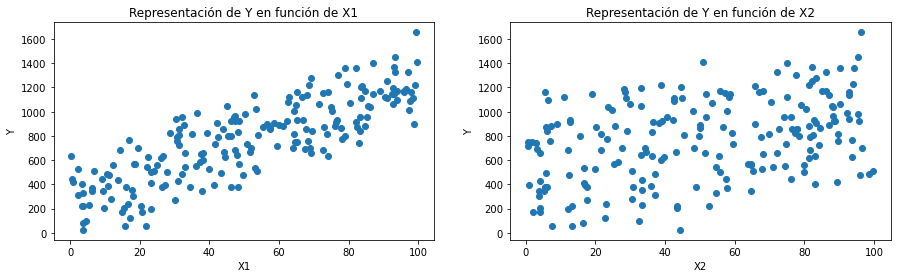

In [22]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)
 
# Represento los puntos para la variable X1 y para Y
p1.scatter(X[:,0], Y)
p1.set_title(u'Representación de Y en función de X1')
p1.set_xlabel('X1')
p1.set_ylabel('Y')
 
p2.scatter(X[:,1], Y)
p2.set_title(u'Representación de Y en función de X2')
p2.set_xlabel('X2')
p2.set_ylabel('Y')


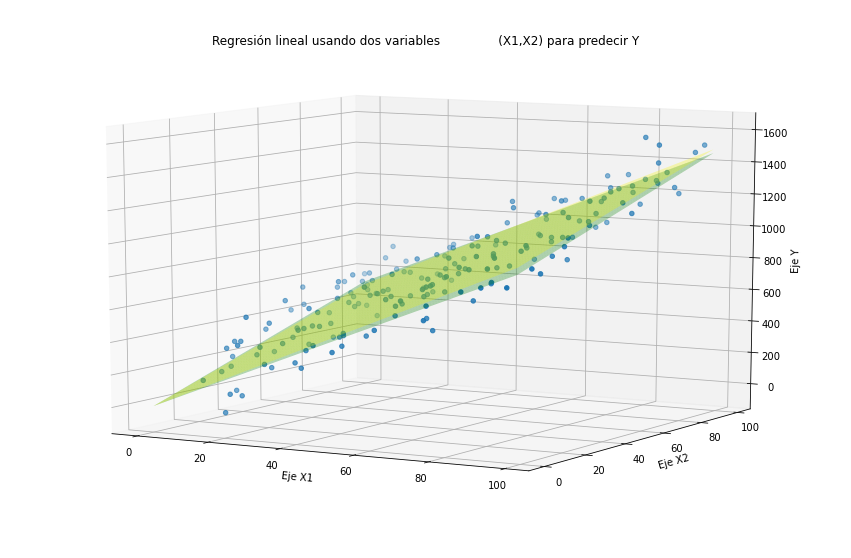

In [7]:
# Represento la superficie que ajusta mejor a los datos
p3 = plt.figure(figsize=(15,10)).gca(projection='3d')
x1, x2 = np.meshgrid(range(100), range(100))
# Superficie que se obtiene con la regresión lineal múltiple
z_modelo = modelo.coef_[0][0]*x1 + modelo.coef_[0][1]*x2
# Superficie real de los datos
z_real = coeficientes_reales[0]*x1 + coeficientes_reales[1]*x2
# Represento ambas superficies
p3.plot_surface(x1, x2, z_modelo, alpha=0.3, color='green')
p3.plot_surface(x1, x2, z_real, alpha=0.3, color='yellow')
# Represento también los datos para ver el ajuste
p3.scatter(X[:,0], X[:,1], Y)
p3.set_title(u'Regresión lineal usando dos variables \
              (X1,X2) para predecir Y')
p3.set_xlabel('Eje X1')
p3.set_ylabel('Eje X2')
p3.set_zlabel('Eje Y')
p3.view_init(10, )
plt.show()


# Evaluación de la precisión del modelo

La calidad del ajuste de la regresión lineal típicamente es evaluada usando dos medidas: el RSE (error estándar de los residuos o residual standard error) y el estadístico R cuadrado.

## RSE

El RSE es una estimación de la desviación estándar del error $\epsilon$. En otras palabras, es la cantidad media que la respuesta se desviará de la recta real de regresión. Se obtiene con la siguiente fórmula:

$$RSE = \sqrt{\frac{RSS}{n-2}}$$

Su valor puede ser bueno o malo dependiendo del contexto ya que no es adimensional. Si los valores son muy grandes, podremos obtener RSE enormes pero relativamente buenos ya que dependen de la dimensión de las Y. Independientemente, valores menores de RSE indican un mejor ajuste.

## Coeficiente de determinación (R cuadrado)

El RSE, al ser una medida absoluta y medirse en unidades de Y, no es muy claro qué constituye un buen RSE. El $R^2$ o coeficiente de determinación, sin embargo toma valores entre 0 y 1, representa la proporción de la varianza explicada y es independiente de la escala de Y.

Para calcular el $R^2$ se usa la siguiente fórmula:

$$R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

siendo TSS (Total sum of squares) la suma total de errores cuadrados. Mide la varianza total de la respuesta Y. Su cálculo es:

$$TSS = \sum_{i=1}^m (y_i - \bar{y})^2$$

RSS mide la variabilidad que queda sin explicar en el modelo. TSS mide la variabilidad inherente de Y antes de modelizar. Es decir, $R^2$ mide la proporción de la variabilidad de Y que es explicada por el modelo. O dicho de otra forma, mide la proporción en términos de error cuadrático que nuestro modelo mejora a un modelo que simplemente diese como predicción para todas las y, la media $\tilde{y}_i= \bar{y}$.

Un valor de $R^2$ cercano a 1 indica que una larga proporción de la variabilidad de Y está explicada o quitada gracias al modelo. Sin embargo, al igual que el RSE, depende de la aplicación lo que haga que un $R^2$ sea bueno o no ya que hay problemas donde el error residual es pequeño y otros donde no lo es.

# Regresion Ridge y Lasso

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

Utilizaremos el paquete sklearn para realizar la regresión de Ridge y Lasso. Las funciones principales de este paquete que nos interesan son Ridge(), que se puede usar para ajustar modelos de regresión de Ridge, y Lasso() que se ajustará a modelos de Lasso. También tienen homólogos con validación cruzada: RidgeCV() y LassoCV(). Los usaremos un poco más tarde.

Como ejemplo, deseamos predecir el salario de un jugador de béisbol sobre la base de varias estadísticas asociadas con el rendimiento en el año anterior.

Antes de continuar, primero asegurémonos de que los valores faltantes se hayan eliminado de los datos.


In [23]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis = 1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

Ahora realizaremos la regresión de Ridge y Lasso para predecir el salario en los datos de los Hitters. Configuremos nuestros datos:

In [24]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    uint8  
 17  Division_W   263 non-null    uint8  
 18  NewLeague_N  263 non-null    uint8  
dtypes: float

Ahora dividimos las muestras en un conjunto de entrenamiento y un conjunto de prueba para estimar el error de prueba de regresión de ridge y lasso:

In [15]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# The Lasso

Para ajustar un modelo de Lasso, usaremos la función Lasso(); sin embargo, donde necesitamos incluir el argumento max_iter = 10000.

La función Lasso() tiene un argumento alfa (λ, pero con un nombre diferente) que se utiliza para ajustar el modelo. Generaremos una matriz de valores alfa que van desde muy grandes a muy pequeños, cubriendo esencialmente el rango completo de escenarios desde el modelo nulo que contiene solo la intersección, hasta el ajuste de mínimos cuadrados:

In [16]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Asociado con cada valor alfa hay un vector de coeficientes de regresión Lasso, que almacenaremos en una matriz de coeficientes. En este caso, es una matriz de 19 × 100, con 19 filas (una para cada predictor) y 100 columnas (una para cada valor de alfa). Recuerde que queremos estandarizar las variables para que estén en la misma escala. Para hacer esto, podemos usar el parámetro normalize = True:

Text(0, 0.5, 'weights')

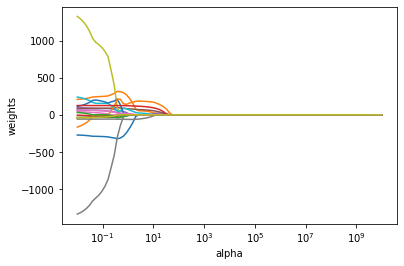

In [25]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Observe que en la gráfica de coeficientes, dependiendo de la elección del parámetro de ajuste, algunos de los coeficientes son exactamente iguales a cero. Ahora realizamos una validación cruzada 10 veces para elegir el mejor alfa, reajustar el modelo y calcular el error de prueba asociado:

In [26]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

104960.65853895503

In [27]:
lassocv.alpha_ # el mejor lambda

2.402973015740077

In [19]:
# Some of the coefficients are reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64

# Referecias

1. https://machinelearningparatodos.com/regresion-lineal-en-python/
2. https://www.cienciadedatos.net/documentos/py04_machine_learning_con_h2o_y_python 
3. http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html#6.6.2-The-Lasso
4. http://www.science.smith.edu/~jcrouser/SDS293/labs/